In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import string

In [3]:
raw_recipes = pd.read_csv('RecipesDataset/RAW_recipes.csv', delimiter=",", low_memory=False)
raw_interactions = pd.read_csv('RecipesDataset/RAW_interactions.csv', delimiter=",", low_memory=False)

In [3]:
print(len(raw_recipes))
print(raw_recipes.columns)

231637
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [4]:
print(len(raw_interactions))
print(raw_interactions.columns)

1132367
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')


In [5]:
print(raw_interactions['user_id'].nunique())

226570


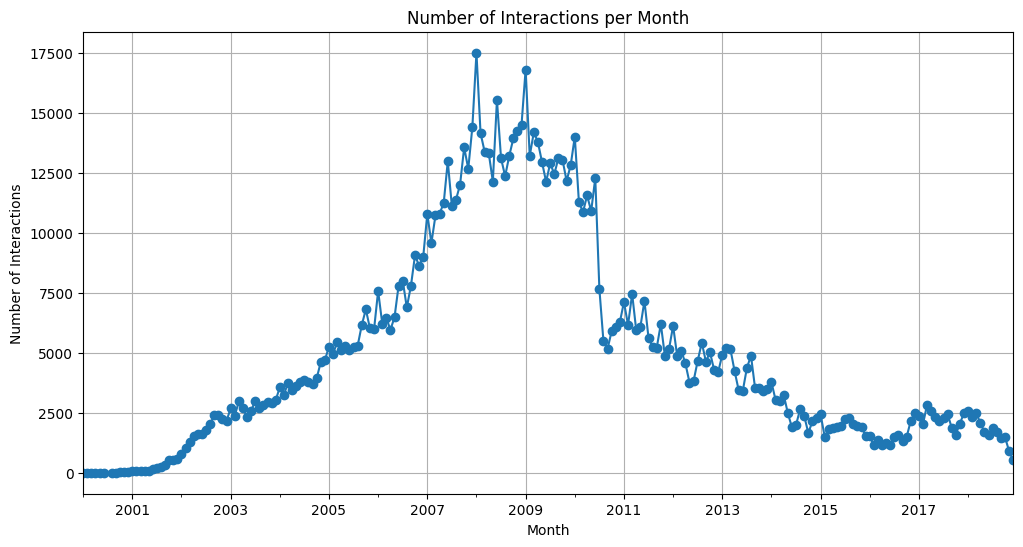

In [6]:
# Convert the date column to a datetime object
raw_interactions['date'] = pd.to_datetime(raw_interactions['date'])

# Extract the month and year from the date column
raw_interactions['year_month'] = raw_interactions['date'].dt.to_period('M')

# Group the data by month and year and count the interactions
monthly_interactions = raw_interactions.groupby('year_month').size()

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
monthly_interactions.plot(kind='line', marker='o')
plt.title('Number of Interactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.show()

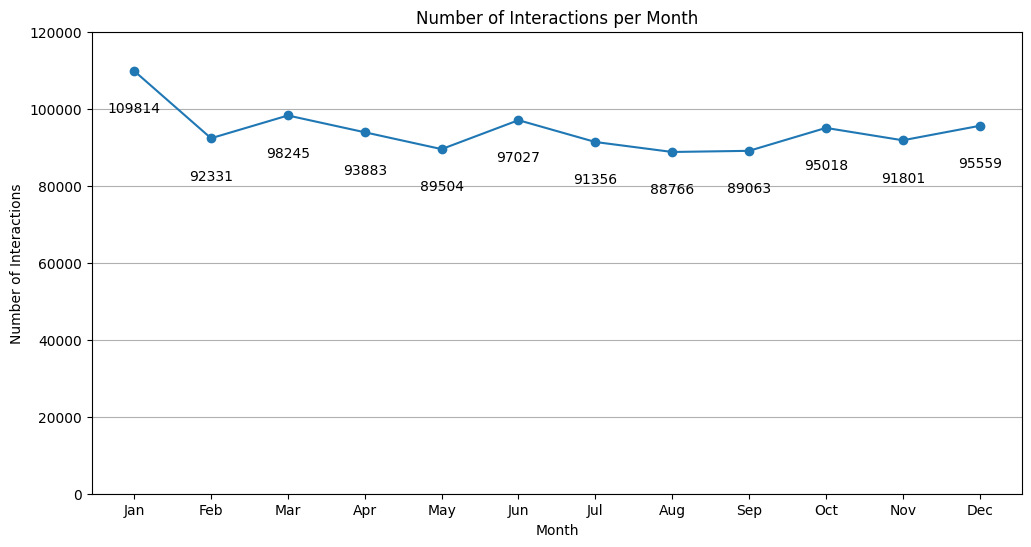

In [7]:
# Extract the month from the date column
raw_interactions['month'] = raw_interactions['date'].dt.month

# Group the data by month and count the interactions
monthly_interactions = raw_interactions.groupby('month').size()

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
monthly_interactions.plot(kind='line', marker='o')
plt.title('Number of Interactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')

plt.ylim(0, 120000)

for i, value in enumerate(monthly_interactions):
    plt.annotate(str(value), (i+1, value), textcoords="offset points", xytext=(0,-30), ha='center')

plt.show()

# Explanation: This doesn't explain much about how interactions change month-to-month.
# I want to graph the change per month.

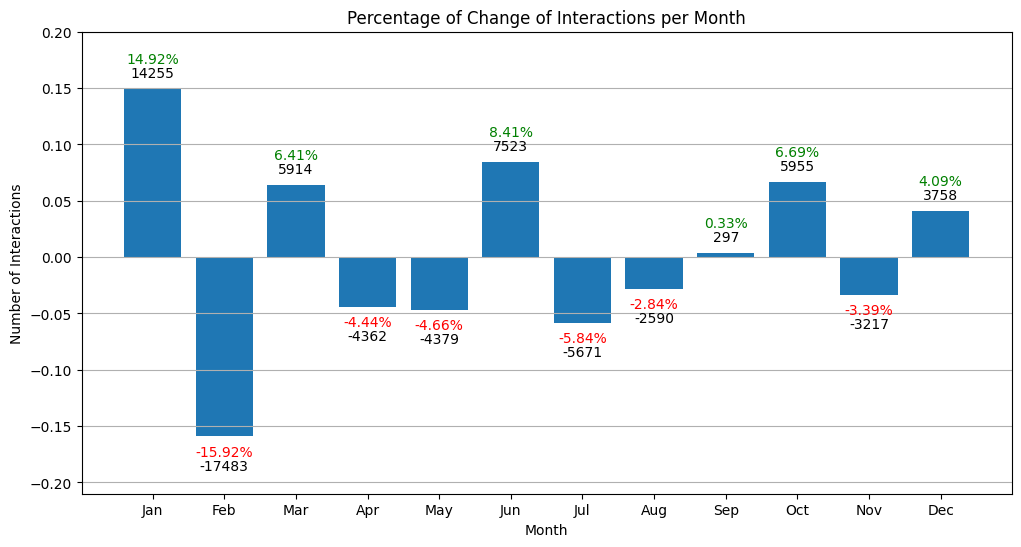

In [8]:
diff_monthly_interactions = monthly_interactions.diff()
pct_diff_monthly_interactions = monthly_interactions.pct_change()
# Calculate January's change from December
diff_monthly_interactions.iloc[0] = monthly_interactions.iloc[0]-monthly_interactions.iloc[-1]
pct_diff_monthly_interactions.iloc[0] = (monthly_interactions.iloc[0]-monthly_interactions.iloc[-1])/monthly_interactions.iloc[-1]

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1,13), pct_diff_monthly_interactions)
plt.title('Percentage of Change of Interactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')

plt.ylim(-0.21,0.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    if height >= 0:
        yText = height + 0.02  # Slightly above the bar
        plt.annotate(f"{height*100:.2f}%", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='bottom', color='green')
        plt.annotate(f"{int(diff_monthly_interactions.iloc[i])}", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='top', color='black')
    else:
        yText = height - 0.02  # Slightly below the bar
        plt.annotate(f"{height*100:.2f}%", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='bottom', color='red')
        plt.annotate(f"{int(diff_monthly_interactions.iloc[i])}", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='top', color='black')

plt.show()

# Explanation: This might not be the best representation as some months have different days.
# I want to try getting the daily average between months and comparing them.

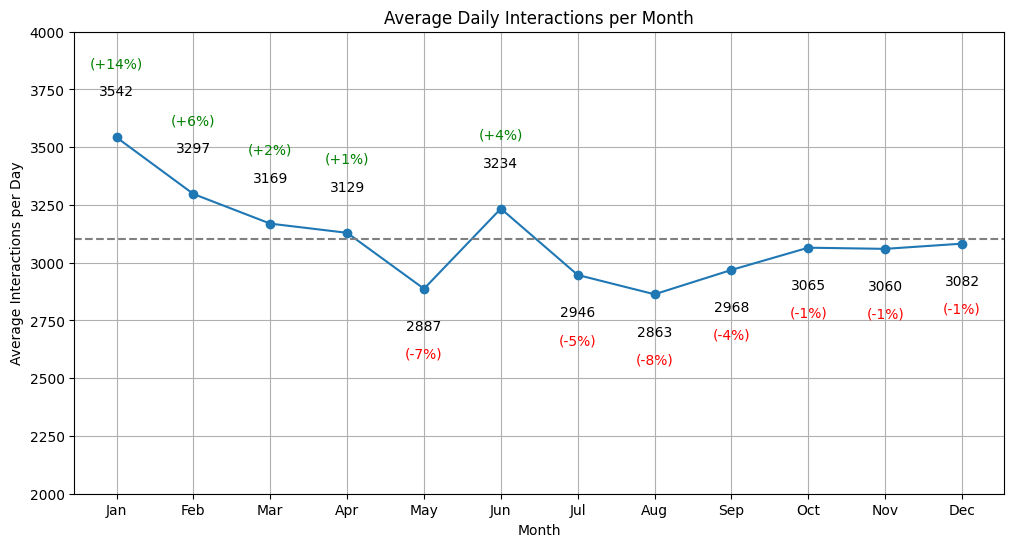

In [9]:
# Extract the day from the date column
raw_interactions['day'] = raw_interactions['date'].dt.day

# Calculate average interactions per day for each month
days_in_month = raw_interactions['date'].dt.days_in_month
avg_daily_interactions = monthly_interactions / days_in_month.groupby(raw_interactions['month']).first()

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
avg_daily_interactions.plot(kind='line', marker='o')

# Draw a horizontal line for the average interactions per day over the year
plt.axhline(y=int(1132367/365), color='gray', linestyle='--', label='Yearly Average Interactions per Day')

plt.title('Average Daily Interactions per Month')
plt.xlabel('Month')
plt.ylabel('Average Interactions per Day')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(2000, 4000)
plt.grid(True)

for i, value in enumerate(avg_daily_interactions):
    percentage_diff = ((value - (1132367/365)) / (1132367/365)) * 100
    if value > 1132367/365:
        plt.annotate(str(int(value)), (i+1, value), textcoords="offset points", xytext=(0,30), ha='center')
        color = 'green'
        plt.annotate(f"({percentage_diff:+.0f}%)", (i+1, value), textcoords="offset points", xytext=(0,50), ha='center', color=color)
    else:
        plt.annotate(str(int(value)), (i+1, value), textcoords="offset points", xytext=(0,-30), ha='center')
        color = 'red'
        plt.annotate(f"({percentage_diff:+.0f}%)", (i+1, value), textcoords="offset points", xytext=(0,-50), ha='center', color=color)

plt.show()

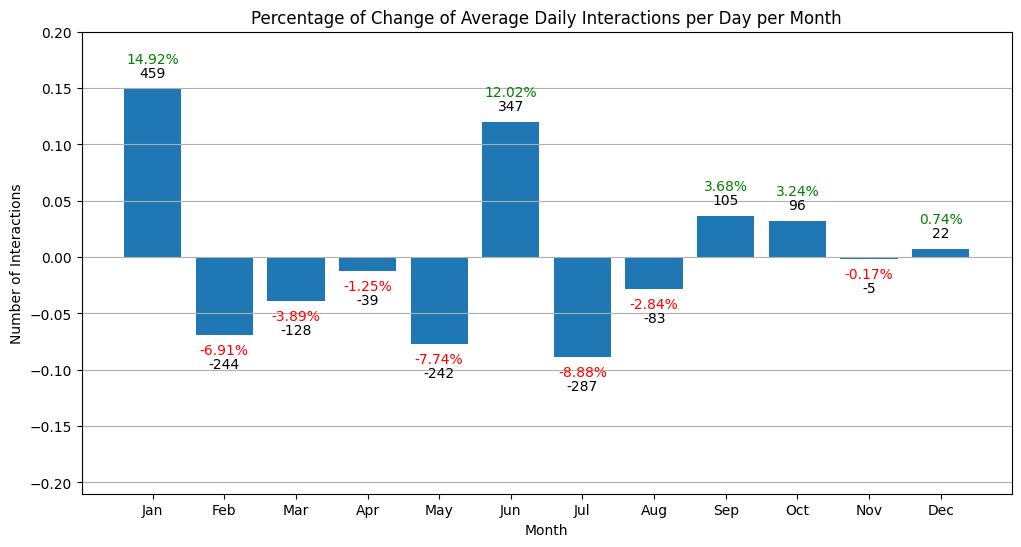

In [10]:
diff_avg_daily_interactions = avg_daily_interactions.diff()
pct_diff_avg_daily_interactions = avg_daily_interactions.pct_change()
# Calculate January's percentage change from December
diff_avg_daily_interactions.iloc[0] = avg_daily_interactions.iloc[0]-avg_daily_interactions.iloc[-1]
pct_diff_avg_daily_interactions.iloc[0] = (avg_daily_interactions.iloc[0]-avg_daily_interactions.iloc[-1])/avg_daily_interactions.iloc[-1]

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1,13), pct_diff_avg_daily_interactions)
plt.title('Percentage of Change of Average Daily Interactions per Day per Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')

plt.ylim(-0.21,0.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    if height >= 0:
        yText = height + 0.02  # Slightly above the bar
        plt.annotate(f"{height*100:.2f}%", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='bottom', color='green')
        plt.annotate(f"{int(diff_avg_daily_interactions.iloc[i])}", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='top', color='black')
    else:
        yText = height - 0.02  # Slightly below the bar
        plt.annotate(f"{height*100:.2f}%", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='bottom', color='red')
        plt.annotate(f"{int(diff_avg_daily_interactions.iloc[i])}", (bar.get_x() + bar.get_width() / 2, yText), ha='center', va='top', color='black')

plt.show()

# Explanation: 

In [11]:
"""
# Group data by month and day and count the interactions, then get the top 3 days per month
daily_interactions = raw_interactions.groupby(['month', 'day']).size().reset_index(name='count')
top_days_per_month = daily_interactions.groupby('month').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
avg_daily_interactions.plot(kind='line', marker='o')

# Add scatter points for the three most popular days for each month
for i, row in top_days_per_month.iterrows():
    plt.scatter(row['month'], row['count'], color='red')

plt.title('Number of Interactions per Day')
plt.xlabel('Day')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(2500, 4500)
plt.grid(True)

for i, value in enumerate(avg_daily_interactions):
    plt.annotate(str(int(value)), (i+1, value), textcoords="offset points", xytext=(0,-30), ha='center')

plt.show()
"""

'\n# Group data by month and day and count the interactions, then get the top 3 days per month\ndaily_interactions = raw_interactions.groupby([\'month\', \'day\']).size().reset_index(name=\'count\')\ntop_days_per_month = daily_interactions.groupby(\'month\').apply(lambda x: x.nlargest(3, \'count\')).reset_index(drop=True)\n\n# Plot the data using Matplotlib\nplt.figure(figsize=(12, 6))\navg_daily_interactions.plot(kind=\'line\', marker=\'o\')\n\n# Add scatter points for the three most popular days for each month\nfor i, row in top_days_per_month.iterrows():\n    plt.scatter(row[\'month\'], row[\'count\'], color=\'red\')\n\nplt.title(\'Number of Interactions per Day\')\nplt.xlabel(\'Day\')\nplt.ylabel(\'Number of Interactions\')\nplt.xticks(ticks=range(1,13), labels=[\'Jan\', \'Feb\', \'Mar\', \'Apr\', \'May\', \'Jun\', \'Jul\', \'Aug\', \'Sep\', \'Oct\', \'Nov\', \'Dec\'])\nplt.ylim(2500, 4500)\nplt.grid(True)\n\nfor i, value in enumerate(avg_daily_interactions):\n    plt.annotate(str(

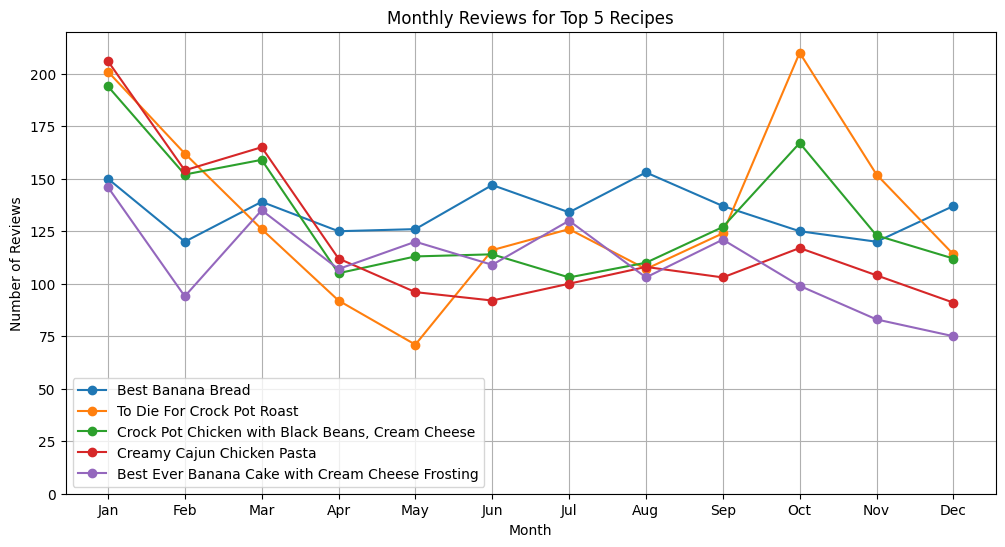

In [12]:
raw_interactions['year'] = raw_interactions['date'].dt.year

top_recipes = raw_interactions['recipe_id'].value_counts().head(5).index.tolist()

recipe_names_dict = {
    top_recipes[0]: 'Best Banana Bread',
    top_recipes[1]: 'To Die For Crock Pot Roast',
    top_recipes[2]: 'Crock Pot Chicken with Black Beans, Cream Cheese',
    top_recipes[3]: 'Creamy Cajun Chicken Pasta',
    top_recipes[4]: 'Best Ever Banana Cake with Cream Cheese Frosting',
}

plt.figure(figsize=(12, 6))
for recipe_id in top_recipes:
    # Filter data for the current recipe
    recipe_data = raw_interactions[raw_interactions['recipe_id'] == recipe_id]

    monthly_reviews = recipe_data.groupby('month').size().reset_index(name='count')

    monthly_reviews = monthly_reviews.set_index('month').reindex(range(1, 13), fill_value=0).reset_index()

    plt.plot(monthly_reviews['month'], monthly_reviews['count'], marker='o', label=f'{recipe_names_dict[recipe_id]}')

plt.title('Monthly Reviews for Top 5 Recipes')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, 220)
plt.grid(True)
plt.legend()
plt.show()

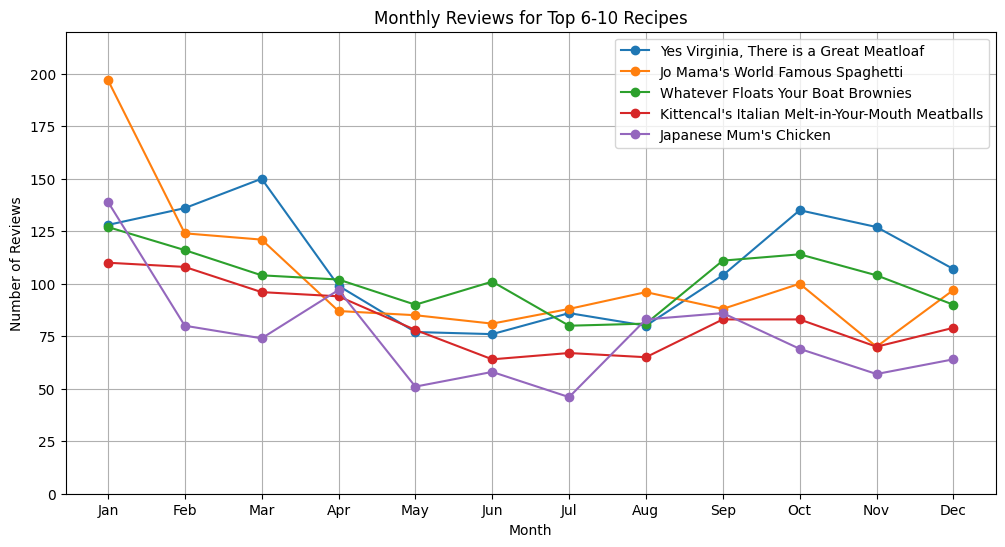

In [13]:
top_recipes2 = raw_interactions['recipe_id'].value_counts().iloc[5:10].index.tolist()

recipe_names_dict = {
    top_recipes2[0]: 'Yes Virginia, There is a Great Meatloaf',
    top_recipes2[1]: 'Jo Mama\'s World Famous Spaghetti',
    top_recipes2[2]: 'Whatever Floats Your Boat Brownies',
    top_recipes2[3]: 'Kittencal\'s Italian Melt-in-Your-Mouth Meatballs',
    top_recipes2[4]: 'Japanese Mum\'s Chicken',
}

plt.figure(figsize=(12, 6))
for recipe_id in top_recipes2:
    # Filter data for the current recipe
    recipe_data = raw_interactions[raw_interactions['recipe_id'] == recipe_id]

    monthly_reviews = recipe_data.groupby('month').size().reset_index(name='count')

    monthly_reviews = monthly_reviews.set_index('month').reindex(range(1, 13), fill_value=0).reset_index()

    plt.plot(monthly_reviews['month'], monthly_reviews['count'], marker='o', label=f"{recipe_names_dict[recipe_id]}")

plt.title('Monthly Reviews for Top 6-10 Recipes')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, 220)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Figure out what the 5 most popular tags are, then track
# their changes throughout the year

# Interactions don't contain information about the recipe tags
# So we need to map recipe ID's to the tags.
# Then, for each interaction, add all tags associated with that
# recipe to our dictionary.
recipe_tags = {}
for _, row in raw_recipes.iterrows():
    recipe_id = row['id']
    tags = row['tags'].strip('[]').replace("'", "").split(', ')
    recipe_tags[recipe_id] = tags

tag_counts = defaultdict(int)
for _, row in raw_interactions.iterrows():
    recipe_id = row['recipe_id']
    if recipe_id in recipe_tags:
        tags = recipe_tags[recipe_id]
        for tag in tags:
            tag_counts[tag] += 1


In [15]:
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Attempt to manually remove irrelevant/overly general tags
# tags_to_drop = {'preparation', "time-to-make", 'course', 'main-ingredient', 'equipment'}
# sorted_filtered_tags = [tag for tag in sorted_tags if tag[0] not in tags_to_drop]

top_5_tags_tuples = sorted_tags[:20]

print("Top 5 Tags:")
for tag, count in top_5_tags_tuples:
    print(f"{tag}: {count}")

top_5_tags = [tag for tag, _ in top_5_tags_tuples]

print(top_5_tags)

Top 5 Tags:
preparation: 1129076
time-to-make: 1110881
course: 1076769
dietary: 906698
main-ingredient: 868466
easy: 632226
occasion: 622916
equipment: 499707
cuisine: 481359
low-in-something: 448497
main-dish: 385383
60-minutes-or-less: 343671
number-of-servings: 341210
meat: 320551
taste-mood: 311627
north-american: 284837
30-minutes-or-less: 267258
vegetables: 260864
oven: 251721
4-hours-or-less: 248367
['preparation', 'time-to-make', 'course', 'dietary', 'main-ingredient', 'easy', 'occasion', 'equipment', 'cuisine', 'low-in-something', 'main-dish', '60-minutes-or-less', 'number-of-servings', 'meat', 'taste-mood', 'north-american', '30-minutes-or-less', 'vegetables', 'oven', '4-hours-or-less']


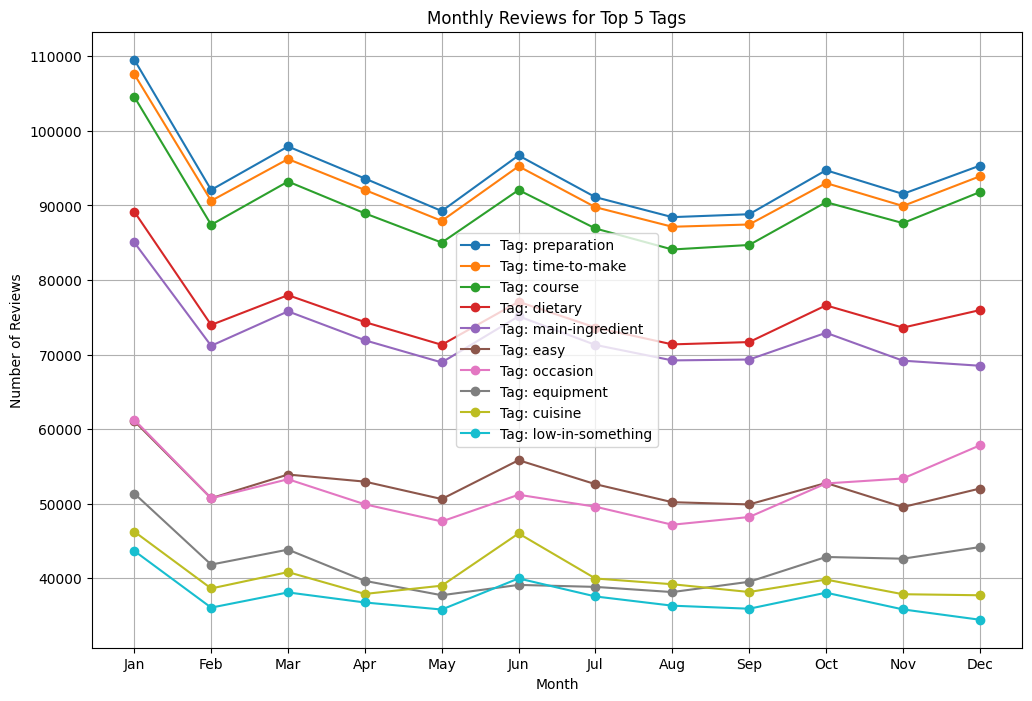

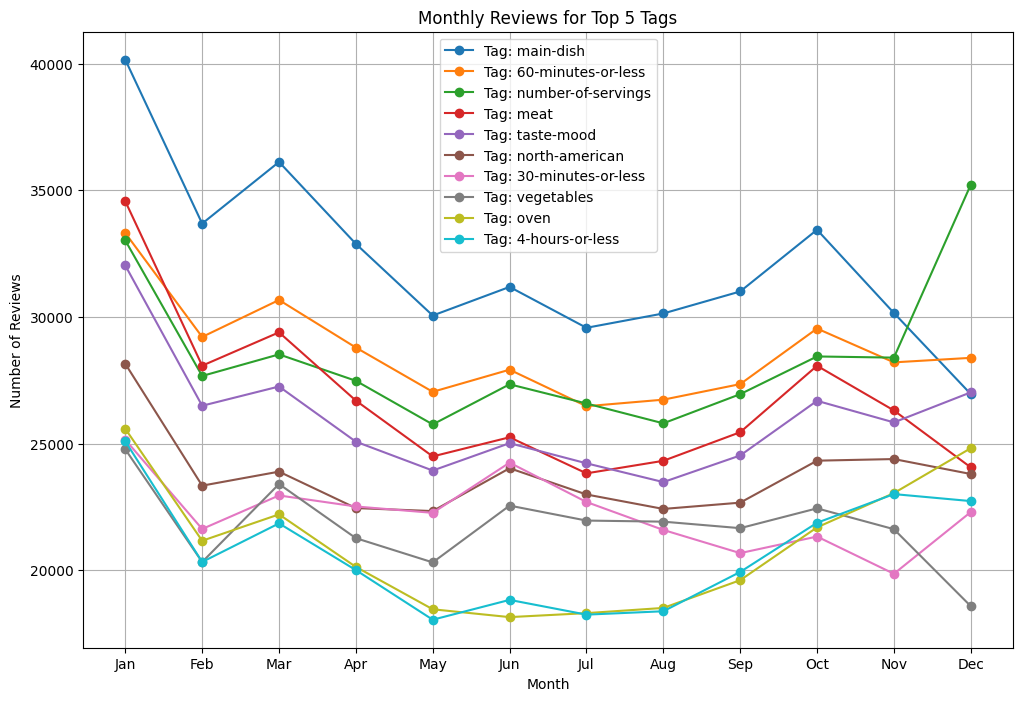

In [16]:
# Filter Recipes and Track Reviews per Month for Filtered Recipes

for i in range(2):
    top_5_tags_tuples = sorted_tags[10*i:10*(i+1)]
    top_5_tags = [tag for tag, _ in top_5_tags_tuples]

    plt.figure(figsize=(12, 8))

    for top_5_tag in top_5_tags:
        recipes_with_tag = {recipe_id for recipe_id, tags in recipe_tags.items() if top_5_tag in tags}
        filtered_interactions = raw_interactions[raw_interactions['recipe_id'].isin(recipes_with_tag)]
        monthly_reviews = filtered_interactions.groupby('month').size().reset_index(name='count')
        monthly_reviews = monthly_reviews.set_index('month').reindex(range(1, 13), fill_value=0).reset_index()

        plt.plot(monthly_reviews['month'], monthly_reviews['count'], marker='o', label=f'Tag: {top_5_tag}')

    plt.title('Monthly Reviews for Top 5 Tags')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend()
    plt.show()

# Conclusion: Don't factor the tags into the model, explain that they
# don't have a significant impact on the number of reviews
# Very few tags deviate from the monthly average. How should I go about including them?
# Maybe use them as a feature in the model, but don't expect them to have a large impact on the number of reviews

# Each tag has at most a small deviation from the monthly average. I considered trying to group tags into different categories
# such as "holiday", "leisure", "experimental", "dietary", etc. but found this to be challenging due to the amount of intersectionality between tags
# as well as the fact that many tags are very general and fit into multiple categories. 
# I decided not to use tags as a feature in the model because I didn't feel that they would have a significant impact on the number of reviews.

In [17]:
# Figure out what the 5 most popular ingredients are, then track
# their changes throughout the year

# Interactions don't contain information about the recipe ingredients
# So we need to map recipe ID's to the ingredients.
# Then, for each interaction, add all ingredients associated with that
# recipe to our dictionary.
recipe_ingredients = {}
for _, row in raw_recipes.iterrows():
    recipe_id = row['id']
    ingredients = row['ingredients'].strip('[]').replace("'", "").split(', ')
    recipe_ingredients[recipe_id] = ingredients

ingredient_counts = defaultdict(int)
for _, row in raw_interactions.iterrows():
    recipe_id = row['recipe_id']
    if recipe_id in recipe_ingredients:
        ingredients = recipe_ingredients[recipe_id]
        for i in ingredients:
            ingredient_counts[i] += 1

In [18]:
sorted_ingredients = sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)

# Attempt to manually remove overly common ingredients
# ingredients_to_drop = {'salt', 'water'}
# sorted_filtered_ingredients = [i for i in sorted_ingredients if i[0] not in ingredients_to_drop]

top_5_ingredients_tuples = sorted_ingredients[:20]

print("Top 5 Tags:")
for i, count in top_5_ingredients_tuples:
    print(f"{i}: {count}")

top_5_ingredients = [i for i, _ in top_5_ingredients_tuples]

print(top_5_ingredients)

Top 5 Tags:
salt: 468403
butter: 299645
sugar: 233854
onion: 193779
water: 181780
eggs: 178000
flour: 154306
olive oil: 151781
milk: 140283
garlic cloves: 119550
pepper: 113697
brown sugar: 107911
garlic: 102506
baking powder: 99630
all-purpose flour: 98681
egg: 93038
baking soda: 87953
parmesan cheese: 87460
vanilla: 84014
vegetable oil: 79001
['salt', 'butter', 'sugar', 'onion', 'water', 'eggs', 'flour', 'olive oil', 'milk', 'garlic cloves', 'pepper', 'brown sugar', 'garlic', 'baking powder', 'all-purpose flour', 'egg', 'baking soda', 'parmesan cheese', 'vanilla', 'vegetable oil']


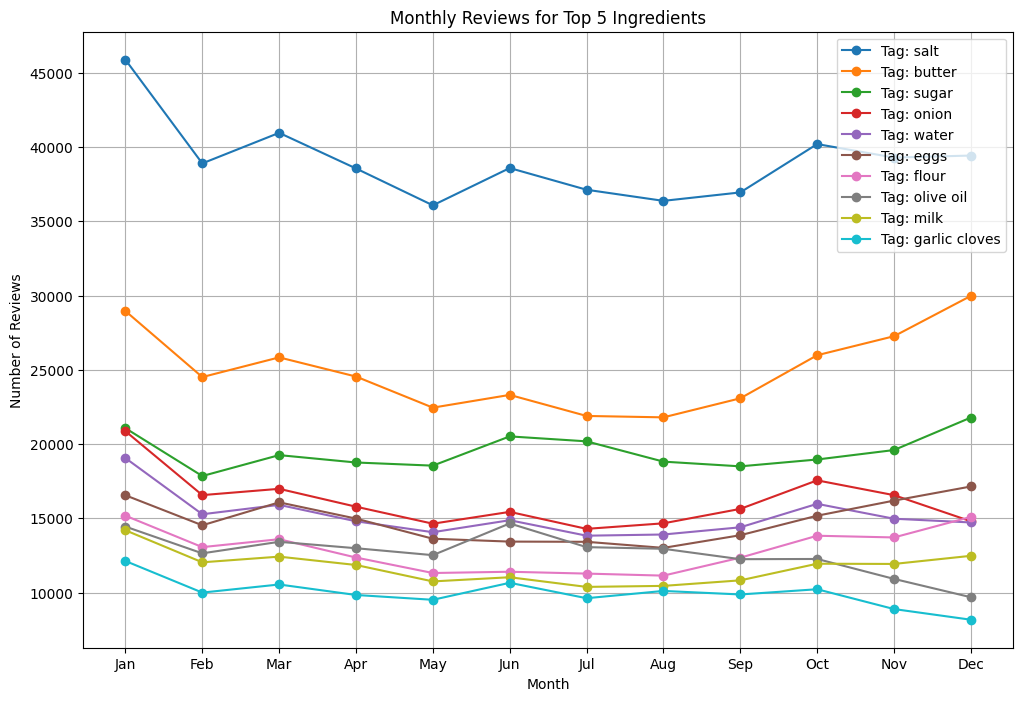

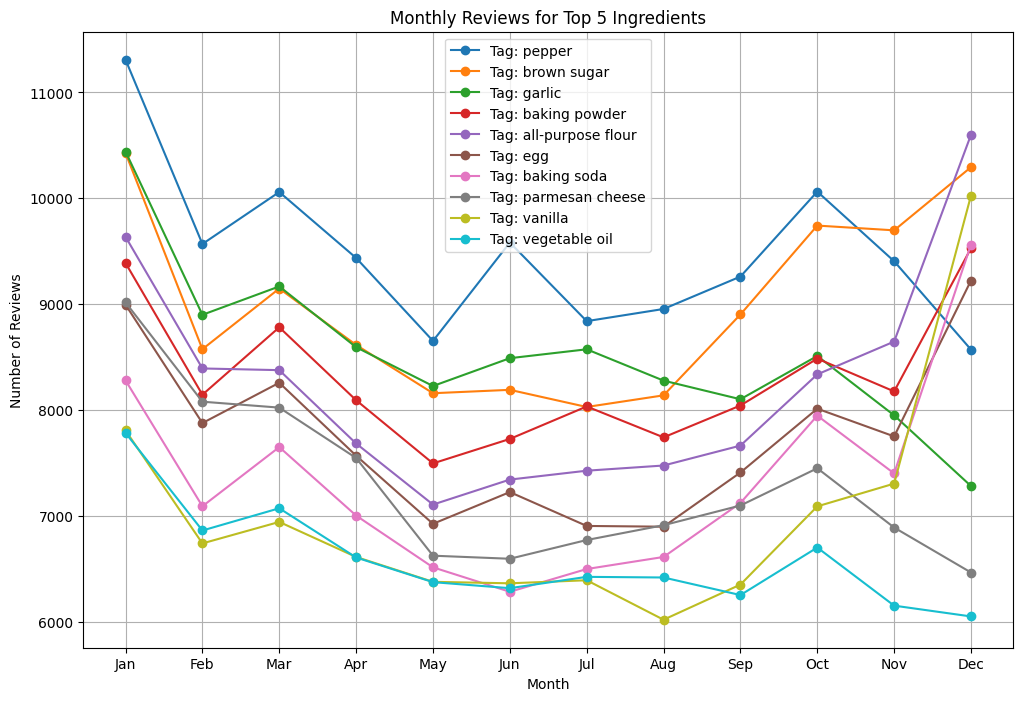

In [19]:
# Filter Recipes and Track Reviews per Month for Filtered Recipes

for i in range(2):
    top_5_ingredients_tuples = sorted_ingredients[10*i:10*(i+1)]
    top_5_ingredients = [i for i, _ in top_5_ingredients_tuples]

    plt.figure(figsize=(12, 8))

    for top_5_ingredient in top_5_ingredients:
        recipes_with_ingredient = {recipe_id for recipe_id, ingredients in recipe_ingredients.items() if top_5_ingredient in ingredients}
        filtered_interactions = raw_interactions[raw_interactions['recipe_id'].isin(recipes_with_ingredient)]
        monthly_reviews = filtered_interactions.groupby('month').size().reset_index(name='count')
        monthly_reviews = monthly_reviews.set_index('month').reindex(range(1, 13), fill_value=0).reset_index()

        plt.plot(monthly_reviews['month'], monthly_reviews['count'], marker='o', label=f'Tag: {top_5_ingredient}')

    plt.title('Monthly Reviews for Top 5 Ingredients')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend()
    plt.show()

# Conclusion: Factor ingredients into the model, as many ingredients find more use in
# certain months than others. For example, many ingredients commonly found in baked goods
# have a spike in usage in December.

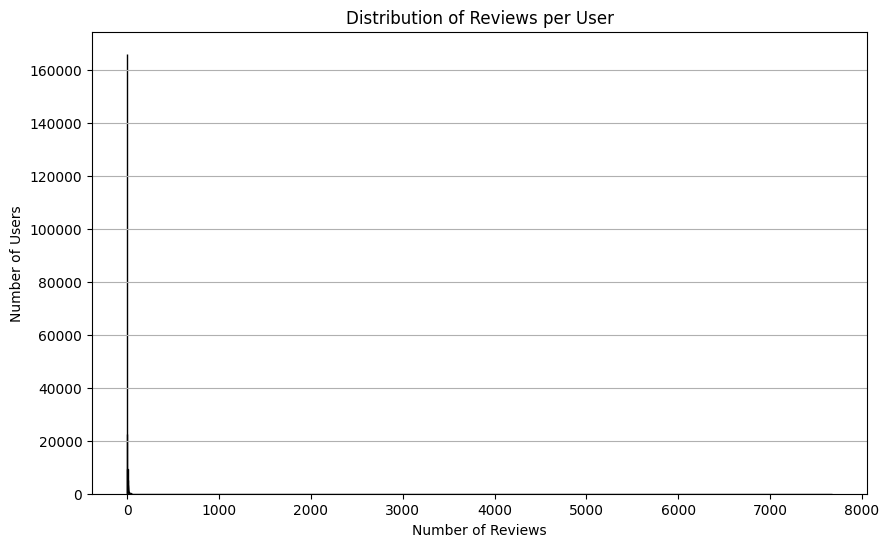

In [20]:
"""
# Create a dictionary of users to lists of their reviews
userReviews = defaultdict(list)
for _, row in raw_interactions.iterrows():
    userReviews[row['user_id']].append(row['review'])
"""

reviews_per_user = raw_interactions['user_id'].value_counts()

# Plot the distribution of users
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=range(1, reviews_per_user.max() + 1), edgecolor='black', color='skyblue')
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y')

plt.show()

In [21]:
print(reviews_per_user.max())

7671


In [22]:
# Create a dictionary of users, separated by numbers of reviews.
user_review_counts = defaultdict(int)

user_review_counts['1'] = reviews_per_user[reviews_per_user == 1].count()
user_review_counts['2'] = reviews_per_user[reviews_per_user == 2].count()
user_review_counts['3'] = reviews_per_user[reviews_per_user == 3].count()
user_review_counts['4'] = reviews_per_user[reviews_per_user == 4].count()
user_review_counts['5 - 10'] = reviews_per_user[(reviews_per_user >= 5) & (reviews_per_user <= 10)].count()
user_review_counts['11 - 100'] = reviews_per_user[(reviews_per_user >= 11) & (reviews_per_user <= 100)].count()
user_review_counts['101 - 200'] = reviews_per_user[(reviews_per_user >= 101) & (reviews_per_user <= 200)].count()
user_review_counts['201 - 1000'] = reviews_per_user[(reviews_per_user >= 201) & (reviews_per_user <= 1000)].count()
user_review_counts['1001 - 5000'] = reviews_per_user[(reviews_per_user >= 1001) & (reviews_per_user <= 5000)].count()
user_review_counts['5001+'] = reviews_per_user[reviews_per_user > 5000].count()

print(user_review_counts)

print(reviews_per_user[reviews_per_user <= 4].sum())
print(reviews_per_user[reviews_per_user > 500].sum())
user_review_counts['201 - 1000'] = reviews_per_user[(reviews_per_user >= 201) & (reviews_per_user <= 1000)].count()
user_review_counts['1001 - 5000'] = reviews_per_user[(reviews_per_user >= 1001) & (reviews_per_user <= 5000)].count()

defaultdict(<class 'int'>, {'1': 166256, '2': 22738, '3': 9346, '4': 5144, '5 - 10': 11640, '11 - 100': 10078, '101 - 200': 674, '201 - 1000': 598, '1001 - 5000': 94, '5001+': 2})
260346
271986


In [23]:
print(raw_interactions['date'].min())
print(raw_interactions['date'].max())
# Last review was on 12-20-2018, so get all reviews from 12-20-2017 to 12-20-2018

reviews_2018 = raw_interactions[(raw_interactions['date'] >= '2017-12-20') & (raw_interactions['date'] <= '2018-12-20')]
print(reviews_2018.count())
# 21656 reviews were left, but 68 recipes have no text in the review

print(reviews_2018['user_id'].nunique())
# 18210 different users contributed to these reviews

2000-01-25 00:00:00
2018-12-20 00:00:00
user_id       21656
recipe_id     21656
date          21656
rating        21656
review        21588
year_month    21656
month         21656
day           21656
year          21656
dtype: int64
18210


In [24]:
recipe_ages = defaultdict(int)

iterat = 0

for _, row in raw_recipes.iterrows():
    recipe_ages[row['id']] = 2018 - int(row['submitted'][:4])

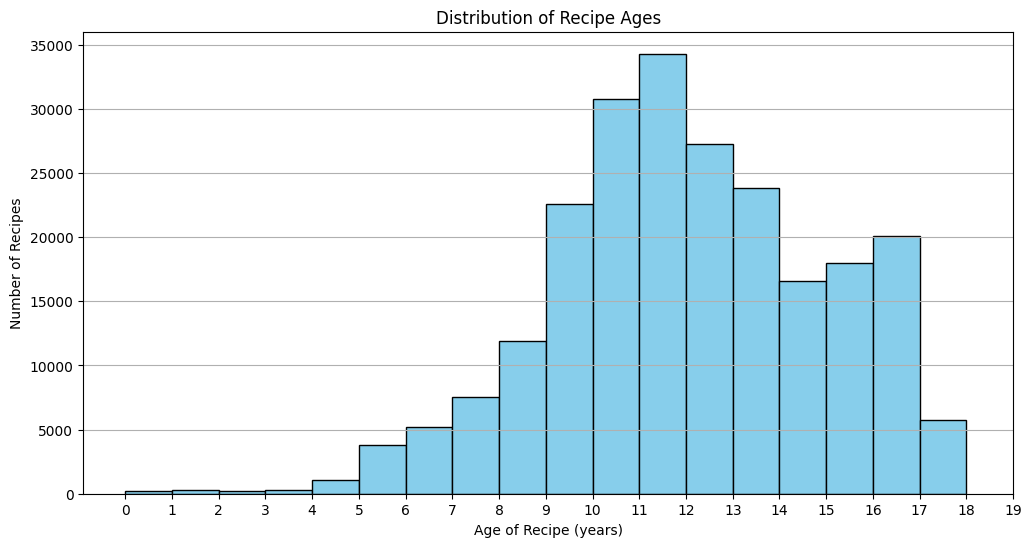

In [25]:
# Plot the distribution of recipe ages as of 2018.
raw_recipes['submitted'] = pd.to_datetime(raw_recipes['submitted'])
raw_recipes['recipe_age'] = 2018 - raw_recipes['submitted'].dt.year

plt.figure(figsize=(12, 6))
plt.hist(raw_recipes['recipe_age'], bins=range(0, 19), edgecolor='black', color='skyblue')
plt.title('Distribution of Recipe Ages')
plt.xlabel('Age of Recipe (years)')
plt.ylabel('Number of Recipes')
plt.xticks(ticks=range(0, raw_recipes['recipe_age'].max() + 1))
plt.grid(axis='y')

plt.show()

C:\Users\aweso\AppData\Local\Temp\ipykernel_26868\2036169395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_2018['recipe_age'] = reviews_2018['recipe_id'].map(recipe_ages)


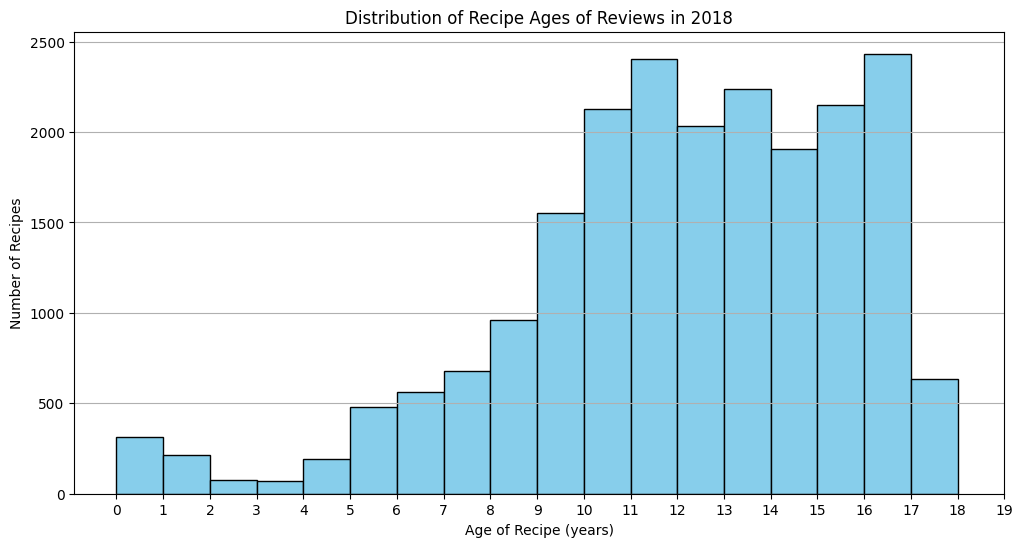

In [26]:
reviews_2018['recipe_age'] = reviews_2018['recipe_id'].map(recipe_ages)

plt.figure(figsize=(12, 6))
plt.hist(reviews_2018['recipe_age'], bins=range(0, 19), edgecolor='black', color='skyblue')
plt.title('Distribution of Recipe Ages of Reviews in 2018')
plt.xlabel('Age of Recipe (years)')
plt.ylabel('Number of Recipes')
plt.xticks(ticks=range(0, raw_recipes['recipe_age'].max() + 1))
plt.grid(axis='y')

plt.show()

In [27]:
recipe_ratings = defaultdict(tuple)
# Recipe ratings:
# recipe: (# of ratings, sum of ratings)

for _, row in raw_interactions.iterrows():
    if row['recipe_id'] not in recipe_ratings:
        recipe_ratings[row['recipe_id']] = (1, row['rating'])
    else:
        numRatings, sumRatings = recipe_ratings[row['recipe_id']]
        recipe_ratings[row['recipe_id']] = (numRatings + 1, sumRatings + row['rating'])

# Average all the ratings
# Divide the sum of ratings by the number of ratings
recipe_ratings_avg = defaultdict(float)
for recipe in recipe_ratings:
    num, sum = recipe_ratings[recipe]
    recipe_ratings_avg[recipe] = round(sum / num, 1)

In [28]:
#List of all recipes with an average rating of 0
recipe_ratings_0 = [recipe_id for recipe_id, avg_rating in recipe_ratings_avg.items() if avg_rating == 0]
reviews_2018_0 = reviews_2018[reviews_2018['recipe_id'].isin(recipe_ratings_0)]
reviews_2018_0.head()

recipes_w_0 = {}
for recipe_id in recipe_ratings_0:
    if recipe_ratings[recipe_id][0] not in recipes_w_0:
        recipes_w_0[recipe_ratings[recipe_id][0]] = 1
    else:
        recipes_w_0[recipe_ratings[recipe_id][0]] += 1

recipes_w_0

{1: 4737, 2: 270, 3: 29, 4: 9, 10: 1, 5: 1}

C:\Users\aweso\AppData\Local\Temp\ipykernel_26868\2442526960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_2018['recipe_ratings'] = reviews_2018['recipe_id'].map(recipe_ratings_avg)


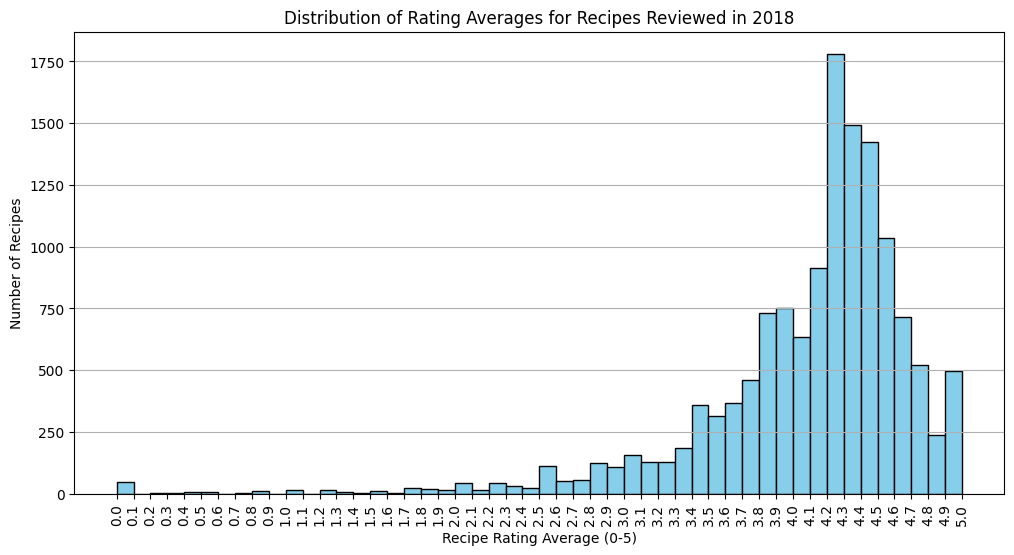

In [29]:
reviews_2018['recipe_ratings'] = reviews_2018['recipe_id'].map(recipe_ratings_avg)

# Filter out recipes with only 1 review - these recipes'
# averages are not reliable for this histogram
review_counts_2018 = reviews_2018['recipe_id'].value_counts()
recipes_with_multiple_reviews = review_counts_2018[review_counts_2018 > 1].index
filtered_reviews_2018 = reviews_2018[reviews_2018['recipe_id'].isin(recipes_with_multiple_reviews)]

# I tried creating the bins by using i in range(50) and appending
# i/10 to the bins, but this led to floating-point precision errors
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
        1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
        2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
        3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
        4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]

plt.figure(figsize=(12, 6))
plt.hist(filtered_reviews_2018['recipe_ratings'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Distribution of Rating Averages for Recipes Reviewed in 2018')
plt.xlabel('Recipe Rating Average (0-5)')
plt.ylabel('Number of Recipes')
plt.xticks(ticks=bins, rotation = 90)
plt.grid(axis='y')

plt.show()

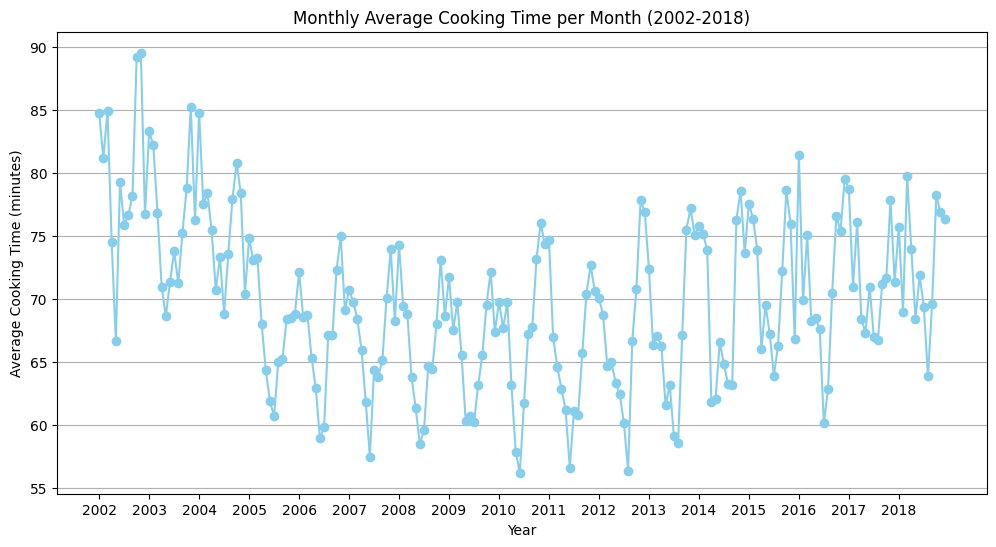

In [63]:
# TIME COOKING INFO
merged_data_minutes = raw_interactions.merge(raw_recipes[['id', 'minutes']], left_on='recipe_id', right_on='id')

merged_data_minutes['year_month'] = merged_data_minutes['date'].dt.to_period('M')

# Some recipes have a cooking time of 2147483647 minutes, or involve
# some form of fermentation over weeks/months. I will filter these out.
merged_data_minutes = merged_data_minutes[merged_data_minutes['minutes'] < 1000]

# I will also exclude the first two years of the dataset, as the low number of reviews
# per month create outlier averages.
merged_data_minutes = merged_data_minutes[merged_data_minutes['year'] > 2001]

monthly_avg_cooking_time = merged_data_minutes.groupby('year_month')['minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_cooking_time['year_month'].astype(str), monthly_avg_cooking_time['minutes'], marker='o', color='skyblue')
plt.title('Monthly Average Cooking Time per Month (2002-2018)')
plt.xlabel('Year')
plt.ylabel('Average Cooking Time (minutes)')
plt.grid(axis='y')

xticks = monthly_avg_cooking_time['year_month'].astype(str)[::12]
xlabels = [str(pd.Period(tick).year) for tick in xticks]
plt.xticks(ticks=xticks, labels=xlabels)

plt.show()

In [ ]:
# SEASONAL TAGS INFO
# Collect a list of tags based on seasonal relevance or that may have temporal trends
# Plot different tags' monthly average reviews to see if they have any trends

# First, get a list of tags. Find and fill out tags that are too general
"""
print("Top 20 Tags:")
for tag, count in sorted_tags[120:140]:
    print(f"{tag}: {count}")
"""

# Tags to keep: 
# dietary, low-in-something, healthy, high-protein
# easy, beginner-cook, inexpensive, 5-ingredients-or-less, 3-steps-or-less
# holiday-event, occasion, seasonal, christmas, summer, fall, winter, spring, thanksgiving, romantic
dietary_tags = ['dietary', 'low-in-something', 'healthy', 'high-protein']
casual_tags = ['easy', 'beginner-cook', 'comfort-food', 'inexpensive', '5-ingredients-or-less', '3-steps-or-less']
seasonal_tags = ['holiday-event', 'seasonal', 'christmas', 'summer', 'fall', 'winter', 'spring', 'thanksgiving']

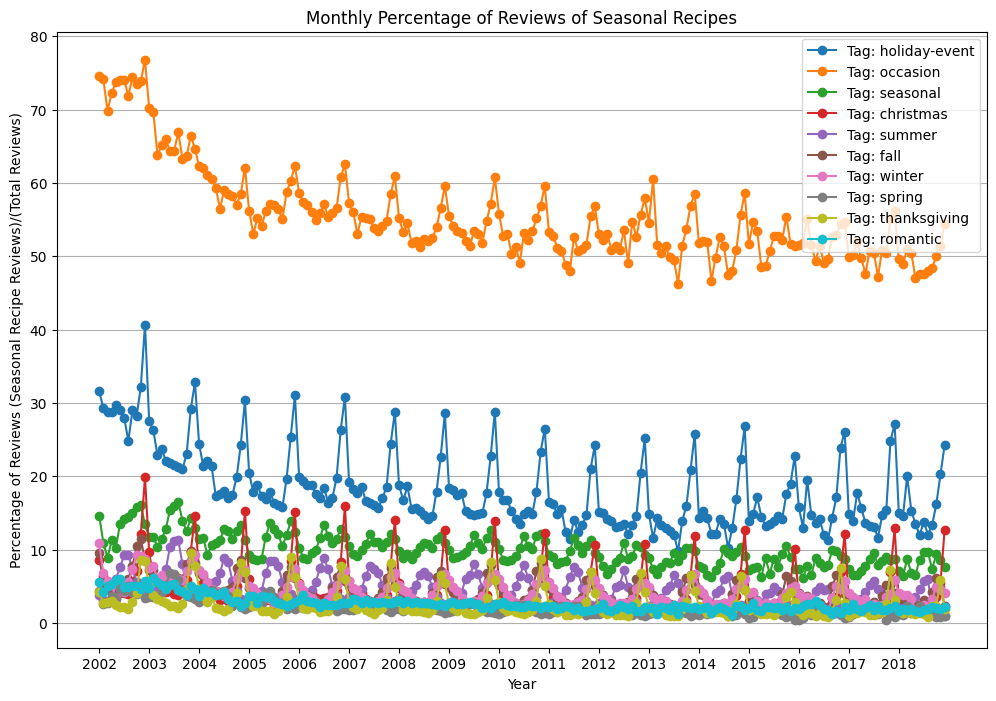

In [62]:
plt.figure(figsize=(12, 8))

for tag in seasonal_tags:
    recipes_with_tag = {recipe_id for recipe_id, tags in recipe_tags.items() if tag in tags}
    raw_interactions = raw_interactions[raw_interactions['year'] > 2001]
    filtered_interactions = raw_interactions[raw_interactions['recipe_id'].isin(recipes_with_tag)]

    monthly_interactions = raw_interactions.groupby('year_month')

    monthly_tag_percentage = []

    for name, group in monthly_interactions:
        total_reviews = len(group)
        reviews_with_tag = group['recipe_id'].apply(lambda x: tag in recipe_tags.get(x, [])).sum()
        percentage_with_tag = (reviews_with_tag / total_reviews) * 100
        monthly_tag_percentage.append((name, percentage_with_tag))

    monthly_tag_percentage_df = pd.DataFrame(monthly_tag_percentage, columns=['year_month', 'percentage'])

    plt.plot(monthly_tag_percentage_df['year_month'].astype(str), monthly_tag_percentage_df['percentage'], marker='o', label=f'Tag: {tag}')

plt.title('Monthly Percentage of Reviews of Seasonal Recipes')
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews (Seasonal Recipe Reviews)/(Total Reviews)')
plt.grid(axis='y')
plt.legend()

xticks = monthly_avg_cooking_time['year_month'].astype(str)[::12]
xlabels = [str(pd.Period(tick).year) for tick in xticks]
plt.xticks(ticks=xticks, labels=xlabels)

plt.show()

In [31]:
year_seasons = [['2018-12', '2018-1', '2018-2'], ['2018-3', '2018-4', '2018-5'], ['2018-6', '2018-7', '2018-8'], ['2018-9', '2018-10', '2018-11']]

#raw_interactions['date'] = pd.to_datetime(raw_interactions['date'])
#raw_interactions['year_month'] = raw_interactions['date'].dt.to_period('M')

"""
for season in year_seasons:
    recipes_10_reviews_season = 0

    for month in season:
        specific_interactions = raw_interactions[raw_interactions['year_month'] == month]

        review_counts = specific_interactions['recipe_id'].value_counts()

        recipes_10_reviews = review_counts[review_counts >= 5]

        recipes_10_reviews_season += len(recipes_10_reviews)

    print(recipes_10_reviews_season)
"""

for season in year_seasons:
    #recipes_10_reviews_season = 0

    for month in season:
        specific_interactions = raw_interactions[raw_interactions['year_month'] == month]

        review_counts = specific_interactions['recipe_id'].value_counts()

        recipes_10_reviews = review_counts[review_counts >= 4]

        print(len(recipes_10_reviews))

    #print(recipes_10_reviews_season)

5
65
53
50
49
26
25
33
39
30
19
8
